# Model Deteksi Status Berat Badan


## Install TensorFlow

In [ ]:
#Install tensorflow
!pip install tensorflowjs
!pip install tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


# Import Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

import os, shutil
import zipfile
from shutil import copyfile
import pathlib
from pathlib import Path

## Load dataset

In [ ]:
# load data dengan kaggle.json
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d arjunk3/bmi-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/arjunk3/bmi-dataset
License(s): unknown
  0% 0.00/278k [00:00<?, ?B/s]
100% 278k/278k [00:00<00:00, 486MB/s]


In [ ]:
# Unzip dataset
!unzip bmi-dataset.zip

Archive:  bmi-dataset.zip
  inflating: BMI.csv                 


# Data Understanding

In [ ]:
bmi_df = pd.read_csv('BMI.csv')
bmi_df.head()

,Age,Height,Weight,BMI,BmiClass,Gender,Activity Level,Body Fat Percentage,Daily Caloric Intake,Heart Rate,Metabolic Age,Recommended Diet,Exercise Routine,Health Risk Level
0,56.0,1.70,75.47,19.45,Normal Weight,Female,Moderately Active,30.82,2536.0,80.0,64.0,Balanced Diet,Mixed Cardio and Strength Training,Low
1,43.0,1.64,86.87,32.30,Obese Class 1,Female,Lightly Active,49.23,2338.0,80.0,86.0,"Low Calorie, High Fiber","Low Impact Cardio, Strength Training",High
2,46.0,1.90,118.09,32.71,Obese Class 1,Male,Sedentary,44.43,3577.0,95.0,61.0,"Low Calorie, High Fiber","Low Impact Cardio, Strength Training",High
3,32.0,1.51,82.58,36.22,Obese Class 2,Male,Moderately Active,45.42,2742.0,63.0,47.0,"Low Calorie, High Protein","Water Aerobics, Low Impact Workouts",Very High
4,60.0,1.80,112.43,34.70,Obese Class 1,Female,Sedentary,50.04,3709.0,70.0,78.0,Balanced Diet,"Low Impact Cardio, Strength Training",High


In [ ]:
bmi_df.info()
bmi_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12098 entries, 0 to 12097
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   12098 non-null  float64
 1   Height                12098 non-null  float64
 2   Weight                12098 non-null  float64
 3   BMI                   12098 non-null  float64
 4   BmiClass              12092 non-null  object 
 5   Gender                11805 non-null  object 
 6   Activity Level        11818 non-null  object 
 7   Body Fat Percentage   11895 non-null  float64
 8   Daily Caloric Intake  11808 non-null  float64
 9   Heart Rate            11726 non-null  float64
 10  Metabolic Age         11994 non-null  float64
 11  Recommended Diet      12098 non-null  object 
 12  Exercise Routine      12098 non-null  object 
 13  Health Risk Level     12098 non-null  object 
dtypes: float64(8), object(6)
memory usage: 1.3+ MB


(12098, 14)

# Data Preparation

In [ ]:
# Mengambil kolom yang relevan
bmi_up = bmi_df[['Age', 'Height', 'Weight', 'BMI', 'Gender', 'BmiClass', 'Exercise Routine']]
bmi_up.head()


,Age,Height,Weight,BMI,Gender,BmiClass,Exercise Routine
0,56.0,1.70,75.47,19.45,Female,Normal Weight,Mixed Cardio and Strength Training
1,43.0,1.64,86.87,32.30,Female,Obese Class 1,"Low Impact Cardio, Strength Training"
2,46.0,1.90,118.09,32.71,Male,Obese Class 1,"Low Impact Cardio, Strength Training"
3,32.0,1.51,82.58,36.22,Male,Obese Class 2,"Water Aerobics, Low Impact Workouts"
4,60.0,1.80,112.43,34.70,Female,Obese Class 1,"Low Impact Cardio, Strength Training"


In [ ]:
# Cek missing value
bmi_up.isnull().sum()

,0
Age,0
Height,0
Weight,0
BMI,0
Gender,293
BmiClass,6
Exercise Routine,0


In [ ]:
# Menampilkan baris yang mengandung missing value di setiap kolom
bmi_up[bmi_up.isnull().any(axis=1)]

,Age,Height,Weight,BMI,Gender,BmiClass,Exercise Routine
6,38.0,1.46,55.28,25.93,NaN,Overweight,"Cardio, Strength Training"
34,43.0,1.76,40.02,12.92,NaN,Underweight,"Strength Training, Weight Gain Program"
86,40.0,1.70,98.44,26.43,NaN,Normal Weight,Mixed Cardio and Strength Training
99,32.0,1.58,109.87,44.01,NaN,Obese Class 3,Medical Supervised Workouts
102,42.0,1.60,56.58,22.10,NaN,Normal Weight,Mixed Cardio and Strength Training
...,...,...,...,...,...,...,...
11839,44.0,1.51,114.33,50.14,NaN,Obese Class 3,Medical Supervised Workouts
11977,57.0,1.98,92.19,23.52,NaN,Normal Weight,Mixed Cardio and Strength Training
11978,54.0,1.85,85.98,25.12,NaN,Overweight,"Cardio, Strength Training"
12049,32.0,1.71,46.89,16.04,NaN,Underweight,"Strength Training, Weight Gain Program"


Note:

Terdapat missing value di kolom gender dan bmi class


In [ ]:
# Cek duplikasi data
print("Jumlah duplikasi data sebelum ditangani: ", bmi_up.duplicated().sum())
#Mengatasi duplikasi data
bmi_up.drop_duplicates(inplace=True)
print("Jumlah duplikasi data setelah ditangani: ", bmi_up.duplicated().sum())

Jumlah duplikasi data sebelum ditangani:  1
Jumlah duplikasi data setelah ditangani:  0


<ipython-input-10-eb436fa7a5ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_up.drop_duplicates(inplace=True)


### Data Cleaning

In [ ]:
# Menangani Missing Values
bmi_up = bmi_up.dropna()

print("Jumlah missing value", bmi_up.isnull().sum())

Jumlah missing value Age                 0
Height              0
Weight              0
BMI                 0
Gender              0
BmiClass            0
Exercise Routine    0
dtype: int64


In [ ]:
 # Copy dataframe
data_clean = bmi_up.copy()


Classification	BMI

- Underweight	Below 18.5
- Normal	18.5-24.9
- Overweight	25.0-29.9
- Class I	30.0-34.9
- Class II	35.0-39.9
- Class III	40 and above

### Memastikann data BMI sesuai rumus

In [ ]:
# Menghitung ulang BMI
bmi_up['BMI'] = bmi_up['Weight'] / (bmi_up['Height'] ** 2)

In [ ]:
# Memastikan bahwa kolom BMI merupakan hasil kalkulasi dengan benar
def classify_bmi(bmi):
    if bmi < 18.4:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal Weight"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    elif 30 <= bmi < 34.9:
        return "Obese Class 1"
    elif 35 <= bmi < 39.9:
        return "Obese Class 2"
    else:
        return "Obese Class 3"

bmi_up['BmiClass'] = bmi_up['BMI'].apply(classify_bmi)


In [ ]:
#Menampilkan kolom bmi dan bmi class saja

bmi_up[['BMI', 'BmiClass']].head()

,BMI,BmiClass
0,26.114187,Overweight
1,32.298483,Obese Class 1
2,32.711911,Obese Class 1
3,36.217710,Obese Class 2
4,34.700617,Obese Class 1


In [ ]:
# Input manual
berat = 72
tinggi = 1.75

bmi = berat / (tinggi ** 2)
kategori = classify_bmi(bmi)

print(f"BMI: {bmi:.2f}")
print(f"Kategori BMI: {kategori}")

BMI: 23.51
Kategori BMI: Normal Weight


# Normalisasi dan Spliting Data

In [ ]:
# Encoding kolom kategorikal
label_encoders = {}
for col in ['Gender', 'BmiClass', 'Exercise Routine']:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])
    label_encoders[col] = le  # Simpan untuk inverse transform nanti

In [ ]:
# Pisahkan fitur dan label
X = data_clean[['Age', 'Height', 'Weight', 'Gender']]
y_bmi = data_clean['BMI']  # Output 1
y_class = data_clean['BmiClass']  # Output 2
y_exercise = data_clean['Exercise Routine']  # Output 3

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_bmi_train, y_bmi_test, y_class_train, y_class_test, y_exercise_train, y_exercise_test = train_test_split(
    X_scaled, y_bmi, y_class, y_exercise, test_size=0.2, random_state=42
)

In [ ]:
print("=== Training Set Shapes ===")
print(f"X_train         : {X_train.shape}")
print(f"y_bmi_train     : {y_bmi_train.shape}")
print(f"y_class_train   : {y_class_train.shape}")
print(f"y_exercise_train: {y_exercise_train.shape}")

print("\n=== Test Set Shapes ===")
print(f"X_test          : {X_test.shape}")
print(f"y_bmi_test      : {y_bmi_test.shape}")
print(f"y_class_test    : {y_class_test.shape}")
print(f"y_exercise_test : {y_exercise_test.shape}")

=== Training Set Shapes ===
X_train         : (9438, 4)
y_bmi_train     : (9438,)
y_class_train   : (9438,)
y_exercise_train: (9438,)

=== Test Set Shapes ===
X_test          : (2360, 4)
y_bmi_test      : (2360,)
y_class_test    : (2360,)
y_exercise_test : (2360,)


In [ ]:
# Menampilkan perbandingan sebelum dan sesudah encoding untuk kolom kategorikal
print("Perbandingan data sebelum dan sesudah encoding:")
for col in ['Gender', 'BmiClass', 'Exercise Routine']:
    print(f"\nKolom: {col}")
    print("Sebelum encoding:")
    # Menggunakan data_clean sebelum encoding untuk menampilkan contoh sebelum encoding
    print(bmi_up[col].value_counts().sort_index())
    print("Sesudah encoding:")
    print(data_clean[col].value_counts().sort_index())

Perbandingan data sebelum dan sesudah encoding:

Kolom: Gender
Sebelum encoding:
Gender
Female    5449
Male      6349
Name: count, dtype: int64
Sesudah encoding:
Gender
0    5449
1    6349
Name: count, dtype: int64

Kolom: BmiClass
Sebelum encoding:
BmiClass
Normal Weight    2790
Obese Class 1    1829
Obese Class 2    1293
Obese Class 3    1765
Overweight       2205
Underweight      1916
Name: count, dtype: int64
Sesudah encoding:
BmiClass
0    3379
1    1690
2    1122
3    1675
4    1977
5    1955
Name: count, dtype: int64

Kolom: Exercise Routine
Sebelum encoding:
Exercise Routine
Cardio, Strength Training                 1958
Low Impact Cardio, Strength Training      1687
Medical Supervised Workouts               1679
Mixed Cardio and Strength Training        3356
Strength Training, Weight Gain Program    1970
Water Aerobics, Low Impact Workouts       1148
Name: count, dtype: int64
Sesudah encoding:
Exercise Routine
0    1958
1    1687
2    1679
3    3356
4    1970
5    1148
Name: c

In [ ]:
# Memeriksa urutan enoding pada kolom BmiClasss
print(label_encoders['BmiClass'].classes_)

['Normal Weight' 'Obese Class 1' 'Obese Class 2' 'Obese Class 3'
 'Overweight' 'Underweight']


In [ ]:
unique, counts = np.unique(y_class_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(2701), np.int64(1): np.int64(1337), np.int64(2): np.int64(923), np.int64(3): np.int64(1328), np.int64(4): np.int64(1570), np.int64(5): np.int64(1579)}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# Input Layer
input_layer = Input(shape=(X_train.shape[1],), name='Input')
# layers Hidden Layers
layers = Dense(128, activation='relu')(input_layer)
layers = Dense(64, activation='relu')(layers)

# Output 1: BMI (regression)
bmi_branch = Dense(32, activation='relu')(layers)
bmi_output = Dense(1, activation='linear', name='BMI')(bmi_branch)

# Output 2: BMI Class (classification)
class_branch = Dense(32, activation='relu')(layers)
bmi_class_output = Dense(len(label_encoders['BmiClass'].classes_), activation='softmax', name='BMI_Class')(class_branch)

# Output 3: Exercise Routine (classification)
exercise_branch = Dense(32, activation='relu')(layers)
exercise_output = Dense(len(label_encoders['Exercise Routine'].classes_), activation='softmax', name='Exercise')(exercise_branch)

# Build model
model = Model(
    inputs=input_layer,
    outputs=[
        bmi_output,
        bmi_class_output,
        exercise_output])

# Compile
model.compile(
    optimizer='adam',
    loss={
        'BMI': 'mse',
        'BMI_Class': 'sparse_categorical_crossentropy',
        'Exercise': 'sparse_categorical_crossentropy'
    },
    metrics={
        'BMI': 'mae',
        'BMI_Class': 'accuracy',
        'Exercise': 'accuracy'
    }
)

# Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 4)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        640 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BMI (Dense)         │ (None, 1)         │         33 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BMI_Class (Dense)   │ (None, 6)         │        198 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Exercise (Dense)    │ (None, 6)         │        198 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,565 (60.80 KB)

 Trainable params: 15,565 (60.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Training model

In [ ]:
history = model.fit(
    X_train,
    {
        'BMI': y_bmi_train,
        'BMI_Class': y_class_train,
        'Exercise': y_exercise_train
    },
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - BMI_Class_accuracy: 0.3393 - BMI_Class_loss: 1.6114 - BMI_loss: 424.7644 - BMI_mae: 15.8089 - Exercise_accuracy: 0.2933 - Exercise_loss: 1.6875 - loss: 428.0636 - val_BMI_Class_accuracy: 0.5508 - val_BMI_Class_loss: 1.2038 - val_BMI_loss: 20.0104 - val_BMI_mae: 3.0919 - val_Exercise_accuracy: 0.4995 - val_Exercise_loss: 1.2367 - val_loss: 22.4509
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - BMI_Class_accuracy: 0.5877 - BMI_Class_loss: 1.1010 - BMI_loss: 18.4666 - BMI_mae: 2.7942 - Exercise_accuracy: 0.5989 - Exercise_loss: 1.1136 - loss: 20.6812 - val_BMI_Class_accuracy: 0.5757 - val_BMI_Class_loss: 1.0469 - val_BMI_loss: 15.0806 - val_BMI_mae: 2.2645 - val_Exercise_accuracy: 0.5800 - val_Exercise_loss: 1.0717 - val_loss: 17.1992
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - BMI_Class_accuracy: 0.6766 - BMI_Class_loss: 0.9325 - BMI_loss: 14.3370 - BMI_mae: 2.0764 - Exercise_accuracy: 0.6555 - Exercise_loss: 0.9556 -

### Visualisasi akurasi dari output

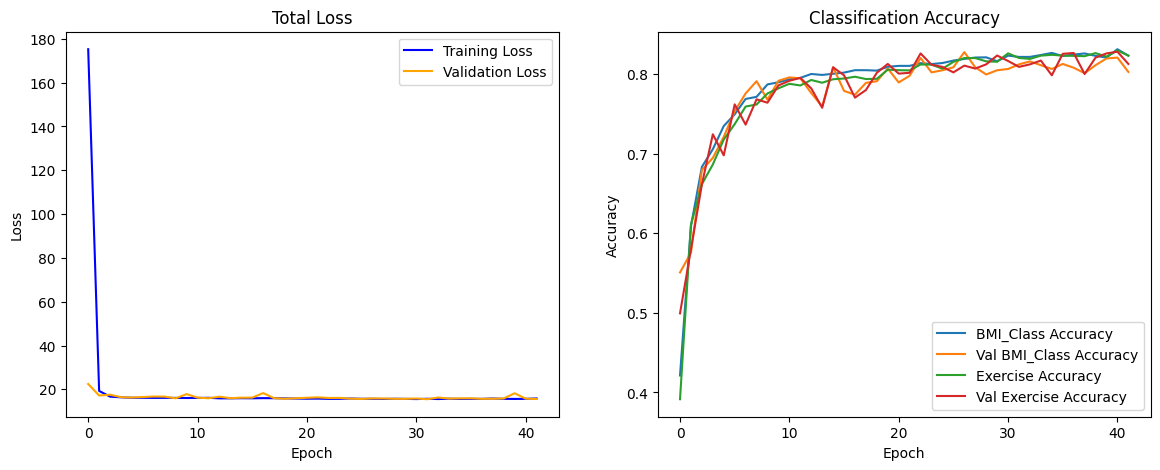

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', c='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orange')
    plt.title('Total Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy untuk ketiga output klasifikasi
    plt.subplot(1, 2, 2)
    plt.plot(history.history['BMI_Class_accuracy'], label='BMI_Class Accuracy')
    plt.plot(history.history['val_BMI_Class_accuracy'], label='Val BMI_Class Accuracy')
    plt.plot(history.history['Exercise_accuracy'], label='Exercise Accuracy')
    plt.plot(history.history['val_Exercise_accuracy'], label='Val Exercise Accuracy')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Panggil fungsi visualisasi
plot_training_history(history)


In [ ]:
eval_results = model.evaluate(
    X_test,
    {
        'BMI': y_bmi_test,
        'BMI_Class': y_class_test,
        'Exercise': y_exercise_test
    }
)

print("\n=== Evaluation results (loss & metrics) ===")
for name, value in zip(model.metrics_names, eval_results):
    print(f"{name}: {value:.4f}")


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - BMI_Class_accuracy: 0.8363 - BMI_Class_loss: 0.6024 - BMI_loss: 12.2693 - BMI_mae: 1.6592 - Exercise_accuracy: 0.8233 - Exercise_loss: 0.6431 - loss: 13.5131

=== Evaluation results (loss & metrics) ===
loss: 14.1435
compile_metrics: 12.9359
BMI_loss: 0.6176
BMI_Class_loss: 0.6508
Exercise_loss: 0.8267


In [ ]:
# Prediksi pada test set
preds = model.predict(X_test)

bmi_pred = preds[0].flatten()  # Prediksi BMI (regresi)
bmi_class_pred = preds[1].argmax(axis=1)  # Prediksi kelas BMI
exercise_pred = preds[2].argmax(axis=1)

# Contoh inverse transform label untuk interpretasi
bmi_class_labels = label_encoders['BmiClass'].inverse_transform(bmi_class_pred)
exercise_labels = label_encoders['Exercise Routine'].inverse_transform(exercise_pred)

# Tampilkan 5 hasil prediksi pertama
for i in range(5):
    actual_bmi_class = label_encoders['BmiClass'].inverse_transform([y_class_test.iloc[i]])[0]
    actual_exercise = label_encoders['Exercise Routine'].inverse_transform([y_exercise_test.iloc[i]])[0]

    print(f"Sample {i+1}:")
    print(f"  BMI Predicted: {bmi_pred[i]:.2f}, Actual: {y_bmi_test.iloc[i]:.2f}")
    print(f"  BMI Class Predicted: {bmi_class_labels[i]}, Actual: {actual_bmi_class}")
    print(f"  Exercise Predicted: {exercise_labels[i]}, Actual: {actual_exercise}")
    print()


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Sample 1:
  BMI Predicted: 28.43, Actual: 27.56
  BMI Class Predicted: Overweight, Actual: Overweight
  Exercise Predicted: Cardio, Strength Training, Actual: Cardio, Strength Training

Sample 2:
  BMI Predicted: 36.58, Actual: 29.62
  BMI Class Predicted: Obese Class 2, Actual: Overweight
  Exercise Predicted: Water Aerobics, Low Impact Workouts, Actual: Cardio, Strength Training

Sample 3:
  BMI Predicted: 48.81, Actual: 50.35
  BMI Class Predicted: Obese Class 3, Actual: Obese Class 3
  Exercise Predicted: Medical Supervised Workouts, Actual: Medical Supervised Workouts

Sample 4:
  BMI Predicted: 33.36, Actual: 25.94
  BMI Class Predicted: Obese Class 1, Actual: Overweight
  Exercise Predicted: Low Impact Cardio, Strength Training, Actual: Cardio, Strength Training

Sample 5:
  BMI Predicted: 21.45, Actual: 20.13
  BMI Class Predicted: Normal Weight, Actual: Normal Weight
  Exercise Predicted: Mixed Cardio and Strength Training, Actual: Mixed 

In [ ]:
print("BMI Class Accuracy:", accuracy_score(y_class_test, bmi_class_pred))
print("Exercise Accuracy:", accuracy_score(y_exercise_test, exercise_pred))

print("\nBMI Class Report:")
print(classification_report(y_class_test, bmi_class_pred))

print("\nExercise Report:")
print(classification_report(y_exercise_test, exercise_pred))

BMI Class Accuracy: 0.8266949152542373
Exercise Accuracy: 0.8144067796610169

BMI Class Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       678
           1       0.79      0.88      0.83       353
           2       0.73      0.85      0.78       199
           3       0.87      0.90      0.89       347
           4       0.79      0.83      0.81       407
           5       0.85      0.94      0.89       376

    accuracy                           0.83      2360
   macro avg       0.82      0.85      0.83      2360
weighted avg       0.83      0.83      0.82      2360


Exercise Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       399
           1       0.78      0.85      0.81       343
           2       0.82      0.91      0.87       342
           3       0.86      0.70      0.77       678
           4       0.88      0.94      0.91       387
           5      

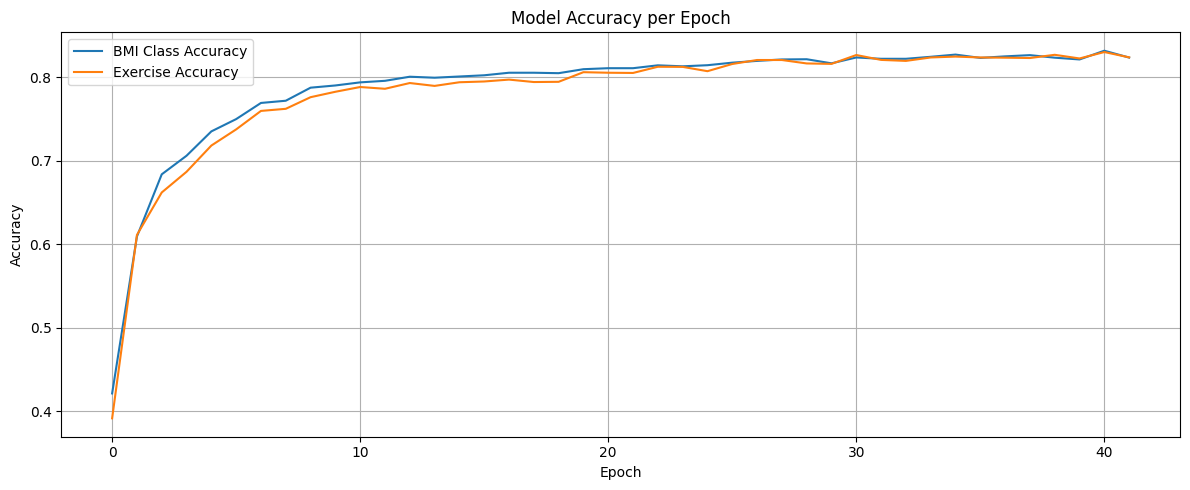

In [ ]:
# Misalnya kamu menyimpan history saat training:
# history = model.fit(...)

plt.figure(figsize=(12, 5))

plt.plot(history.history['BMI_Class_accuracy'], label='BMI Class Accuracy')
plt.plot(history.history['Exercise_accuracy'], label='Exercise Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Simpan model
model.save("model_tf_berat_badan.h5")

# Simpan scaler dan encoder dengan joblib
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoder.pkl')

['label_encoder.pkl']

### Inference sederhana

In [ ]:
def prediksi_tf_multioutput(model, scaler, label_encoders):
    print("=== Prediksi Berat Badan dan Rekomendasi ===")
    nama = input("Nama: ")
    usia = float(input("Usia: "))
    gender_input = input("Gender (laki-laki/perempuan): ").lower()
    berat = float(input("Berat badan (kg): "))
    tinggi = float(input("Tinggi badan (cm): ")) / 100

    bmi = berat / (tinggi ** 2)
    gender = 1 if gender_input == 'laki-laki' else 0

    # Siapkan input
    input_data = np.array([[usia, tinggi, berat, gender]])
    input_scaled = scaler.transform(input_data)

    # Prediksi dengan model multi-output
    pred = model.predict(input_scaled)

    # Ambil hasil prediksi
    bmi_pred = pred[0].flatten()[0]
    bmi_class_pred = np.argmax(pred[1], axis=1)[0]
    exercise_pred = np.argmax(pred[2], axis=1)[0]

    # Konversi ke label asli
    bmi_class_label = label_encoders['BmiClass'].inverse_transform([bmi_class_pred])[0]
    exercise_label = label_encoders['Exercise Routine'].inverse_transform([exercise_pred])[0]

    # Output hasil
    print(f"\n--- Hasil Prediksi untuk {nama} ---")
    print(f"BMI Predicted (model): {bmi_pred:.2f}")
    print(f"Halo {nama}, Berdasarkan hasil BMI: {bmi:.2f})")
    print(f"Status Berat Badan kamu: {bmi_class_label}")
    print(f"Rekomendasi Olahraga: {exercise_label}")

In [ ]:
# Panggil fungsi prediksi_tf_multioutput
prediksi_tf_multioutput(model, scaler, label_encoders)

=== Prediksi Berat Badan dan Rekomendasi ===
Nama: Kayo
Usia: 34
Gender (laki-laki/perempuan): laki-laki
Berat badan (kg): 56
Tinggi badan (cm): 178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

--- Hasil Prediksi untuk Kayo ---
BMI Predicted (model): 17.91
Halo Kayo, Berdasarkan hasil BMI: 17.67)
Status Berat Badan kamu: Underweight
Rekomendasi Olahraga: Strength Training, Weight Gain Program


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Save Model

In [ ]:
# Menyimpan model sebagai keras
model.save('model.h5')

In [ ]:
# Menyimpan model sebagai tfjs
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-06-08 02:56:22.404074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749351382.437815   16758 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749351382.447461   16758 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
# Menyimpan tfjs model dalam bentuk zip
!zip -r tfjs_model.zip tfjs_model

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/model.json (deflated 87%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 7%)
